## Exemplo de uso da classe **Evaluation**

A classe foi desenvolvida apenas para reforçar o aprendizado sobre as métricas de avaliação 
de modelos de regressão e também prática de código.\
Aqui está um exemplo de como aplicar a class com os dados.

As métricas disponíveis são: **MAE, MSE, RMSE e R²**.

In [1]:
import os
os.chdir("..")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from main.evaluation import Evaluation

pd.set_option('display.float_format', lambda x: '%.2f' % x)

plt.style.use(['ggplot'])
plt.rcParams["figure.figsize"] = [8, 4]             # tamanho padrão das figs
plt.rcParams["figure.dpi"] = 100                     # resolução das figs

%load_ext autoreload
%autoreload 2

## Gerando dados fictícios

In [3]:
def linear_regression_data(x):
    """
    Gera dados de simulação de uma regressão.
    """
    b0 = np.random.randint(-10, 10)
    b1 = np.random.randint(10, 15) 
    e = np.random.normal(0, 100, len(x))
    
    return b0 + b1*x + e, b0 + b1*x, [b0, b1]

x = np.arange(100)
y, y_pred, betas = linear_regression_data(x)

## Plot dos dados gerados

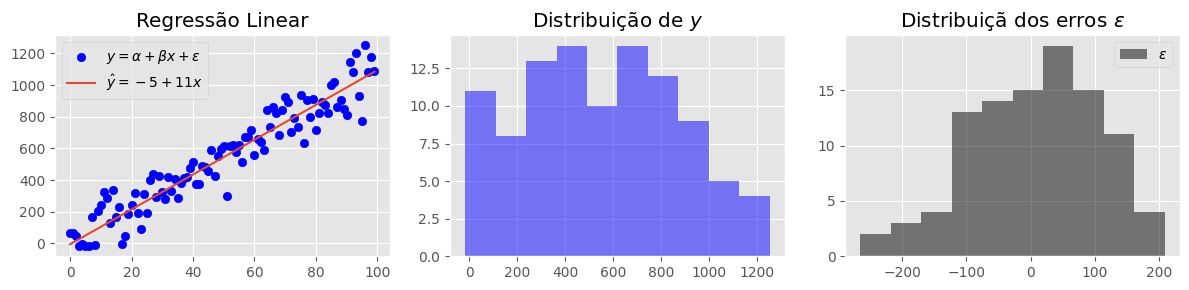

In [4]:
y_label = r'$y = \alpha + \beta x + \epsilon$'
y_pred_label = r'$\hat{y} = ' + f'{betas[0]} + ' + f'{betas[1]}' + r'x$'
error_label = r'$\epsilon$'

plt.figure(figsize=(12, 3))

# dispersão de y e regressão
plt.subplot(1, 3, 1)
plt.scatter(x=x, y=y, label=y_label, color='b')
plt.plot(x, y_pred, label=y_pred_label)
plt.legend()
plt.title(r'Regressão Linear')

# histograma de y
plt.subplot(1, 3, 2)
plt.hist(y, alpha=.5, color='blue', bins=10)
plt.title(r'Distribuição de ${y}$')

# histograma dos erros
plt.subplot(1, 3, 3)
plt.hist((y-y_pred), alpha=.5, color='black', bins=10, label=error_label)
plt.legend()
plt.title(r'Distribuiçã dos erros $\epsilon$')

plt.tight_layout()
plt.show()

## Uso da classe

In [5]:
## uso da class Evaluation
eval_model = Evaluation(y, y_pred)
eval_model.summary()

,MAE,MSE,RMSE,R2
0,80.46,9845.78,99.23,0.91
